In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\GF63\AppData\Local\Temp\ipykernel_11780\1837149555.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Exploratory Data Analysis 

In [2]:
URL = "dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Seeing how Flight number and payload can affect the launch outcome 

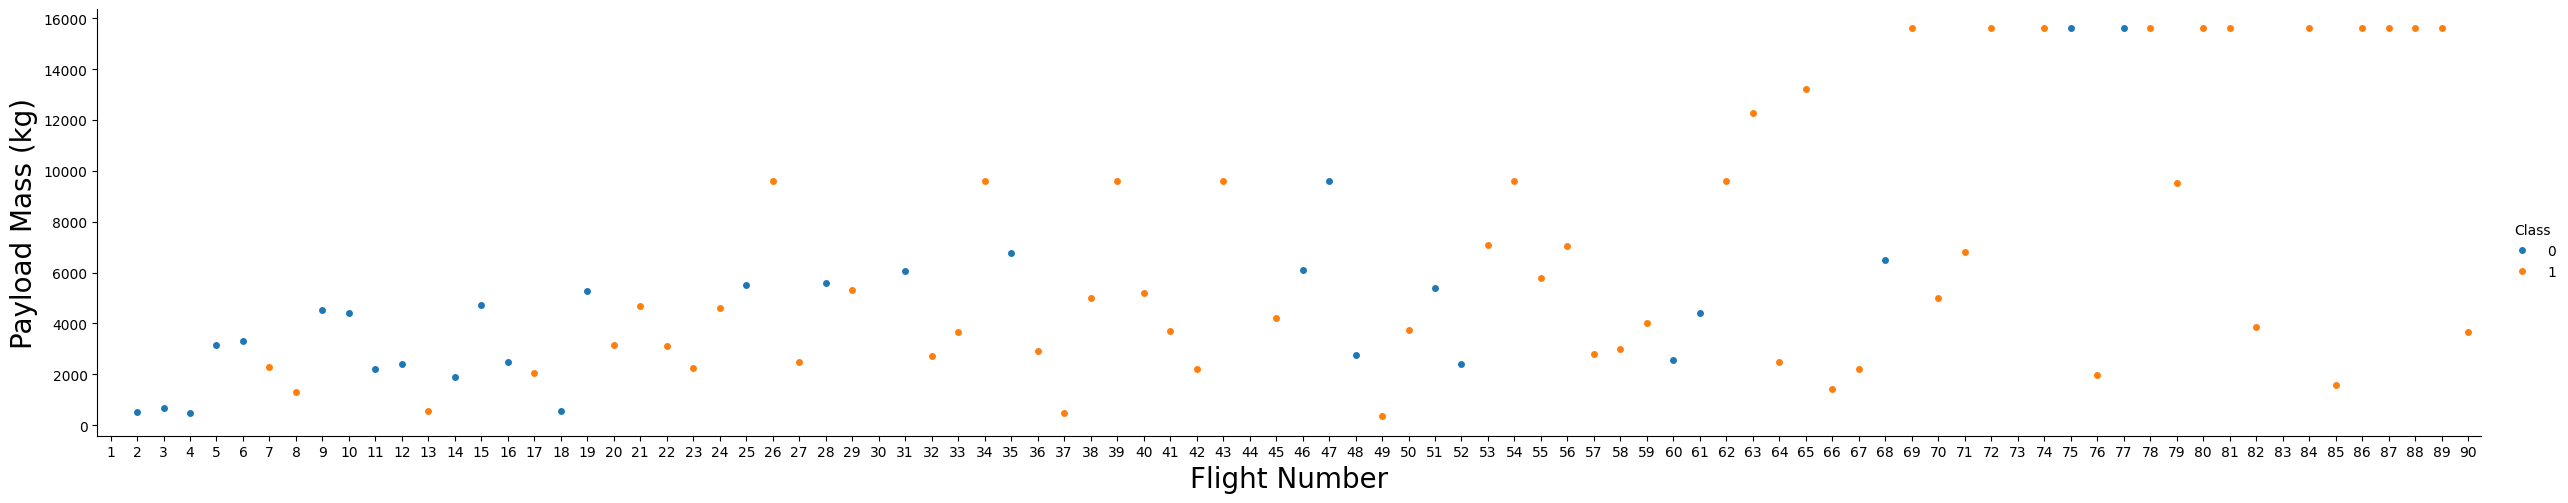

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data = df, aspect=5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Payload Mass (kg)", fontsize = 20)
plt.show()



We notice that the higher the flight number is, the most likely it is to succed. 

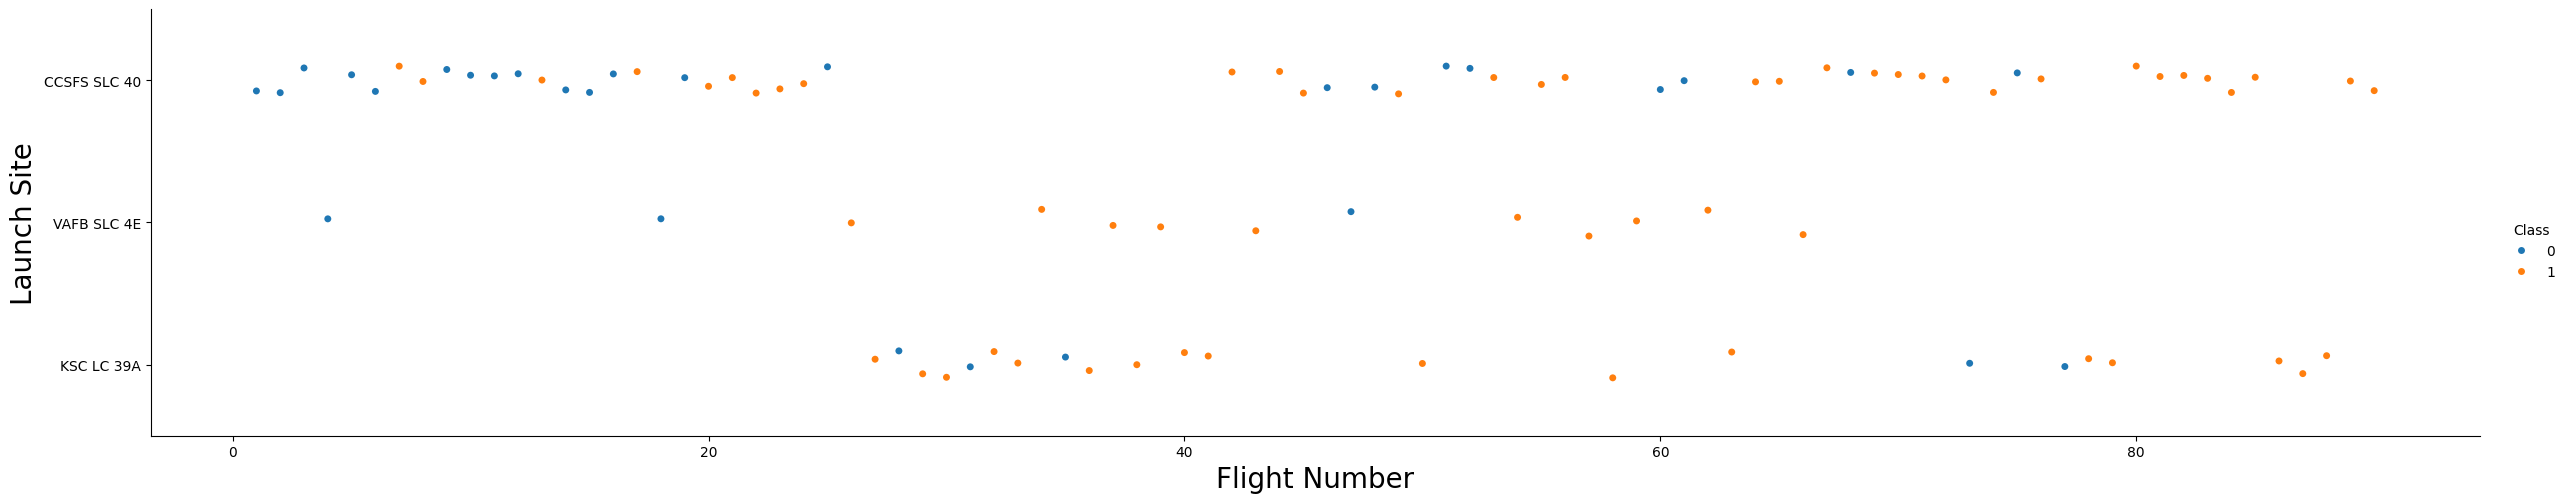

In [4]:
#relationship between flight number and launch site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Launch Site", fontsize = 20)
plt.show()

KSC LC 39A and VAFB SLC 4E have a higher success rate than the one found in CCSFS SLC 40. 

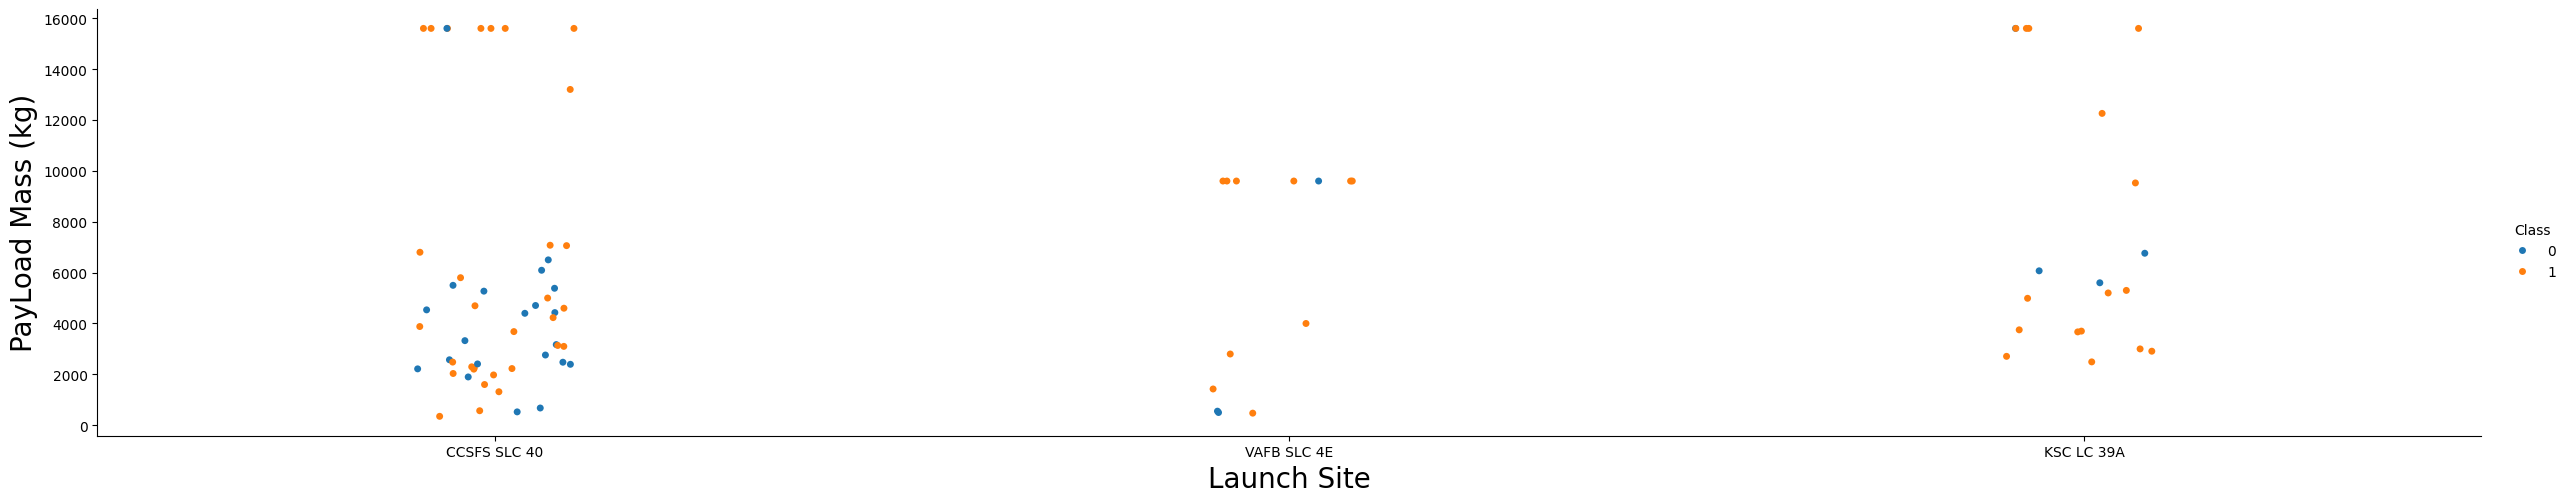

In [5]:
#relationship between payload and launch site
sns.catplot(y = "PayloadMass", x="LaunchSite", hue="Class", data=df, aspect=5)
plt.xlabel("Launch Site", fontsize = 20)
plt.ylabel("PayLoad Mass (kg)", fontsize = 20)
plt.show()

VAFB SLC 4E didn't have any launch with a payload higher than 10000 kgs

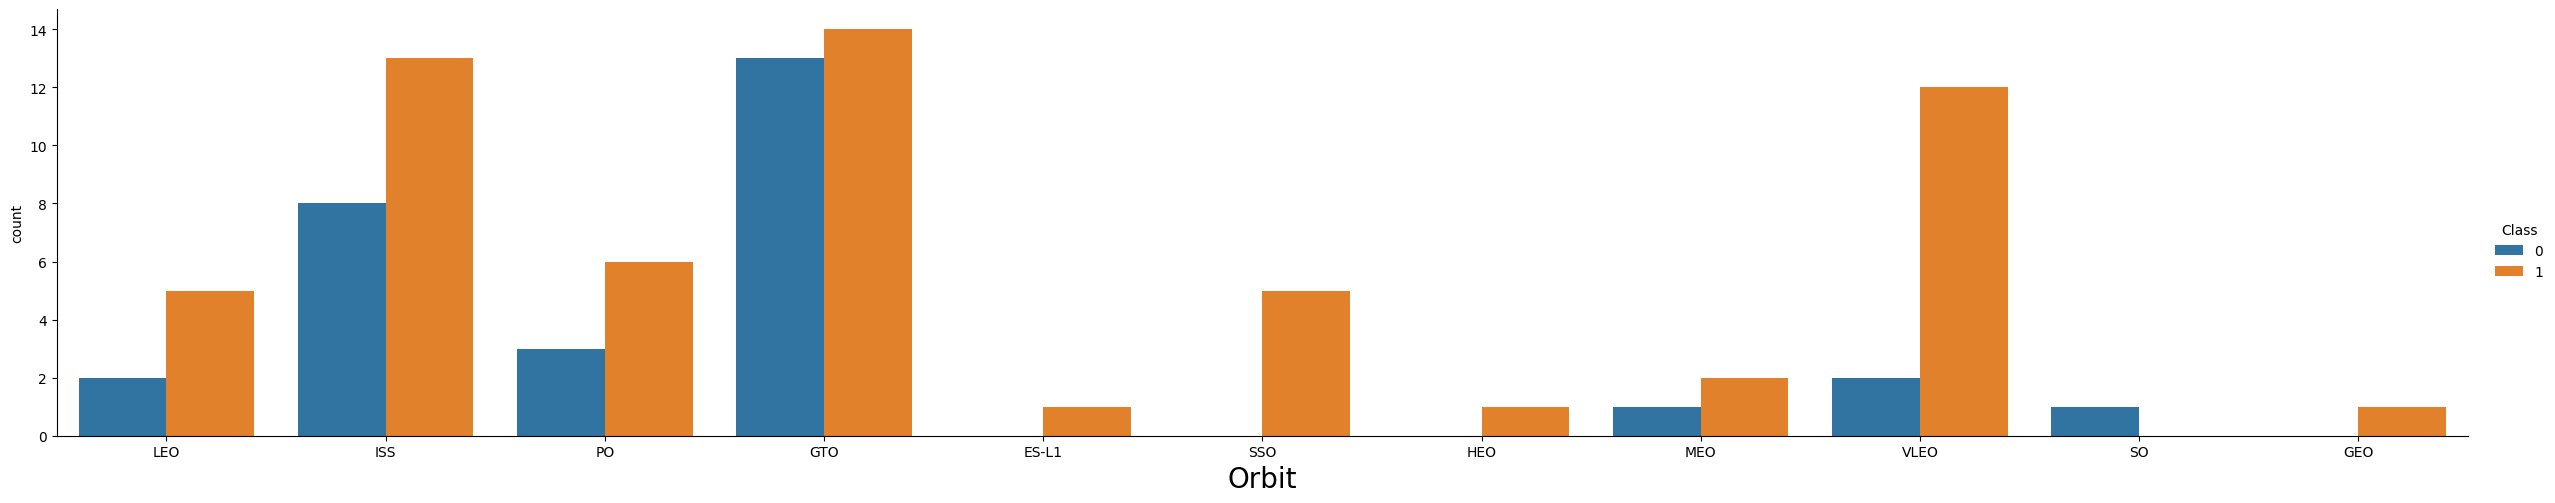

In [6]:
#Envision th success rate of each orbit type 
sns.catplot(x="Orbit", hue = "Class", data = df, kind = "count", aspect = 5)
plt.xlabel("Orbit", fontsize = 20)
plt.show()

We notice that ES-L1, SSO, HEO and GEO have no failing attempts. 

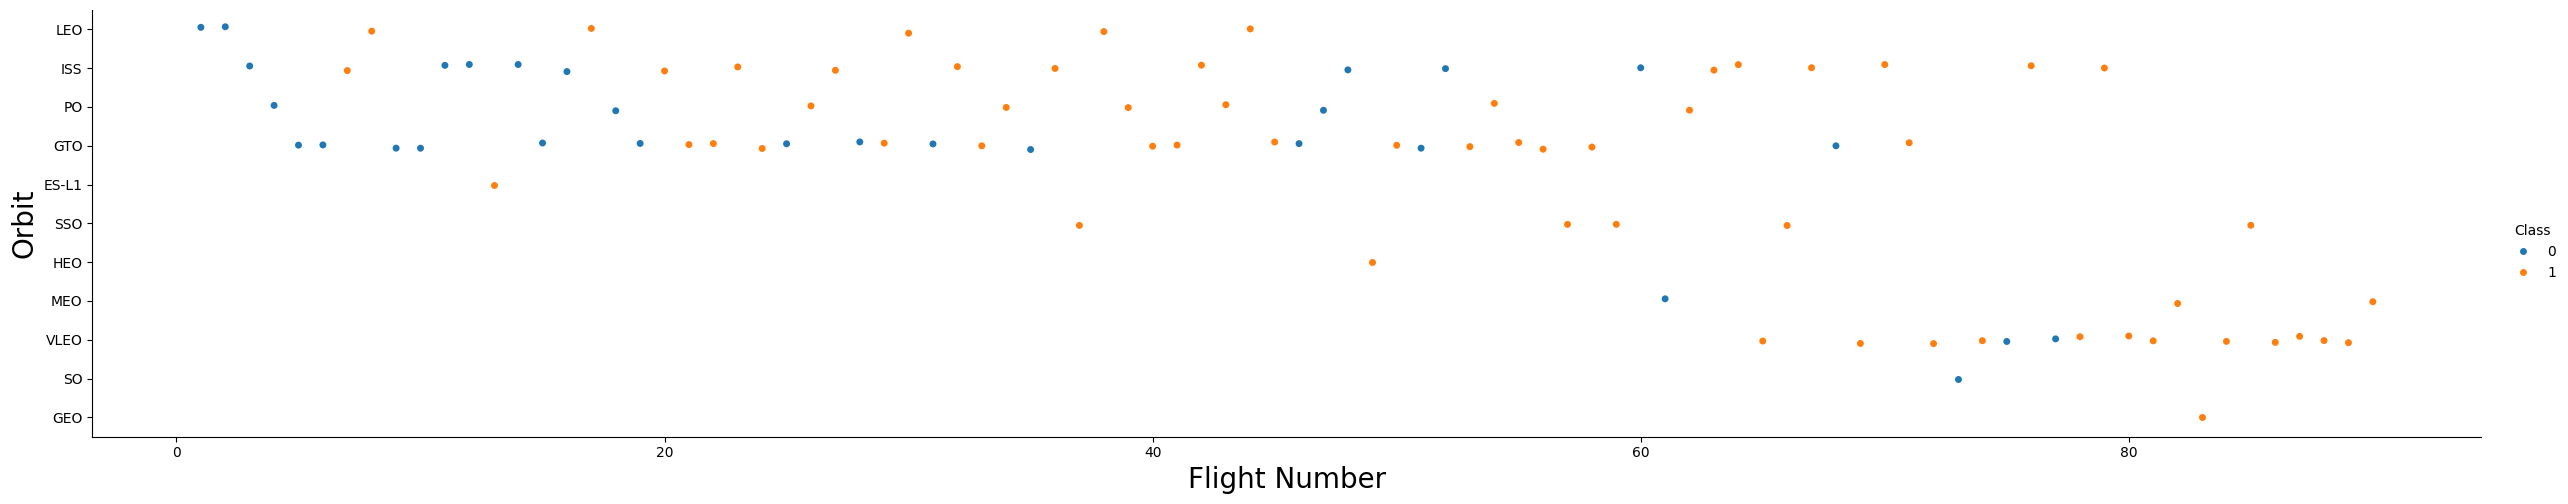

In [7]:
#Vizualize the relationship between FlightNumber and Orbit type 
sns.catplot(y="Orbit", x="FlightNumber", hue = "Class", data=df, aspect = 5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

In the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit

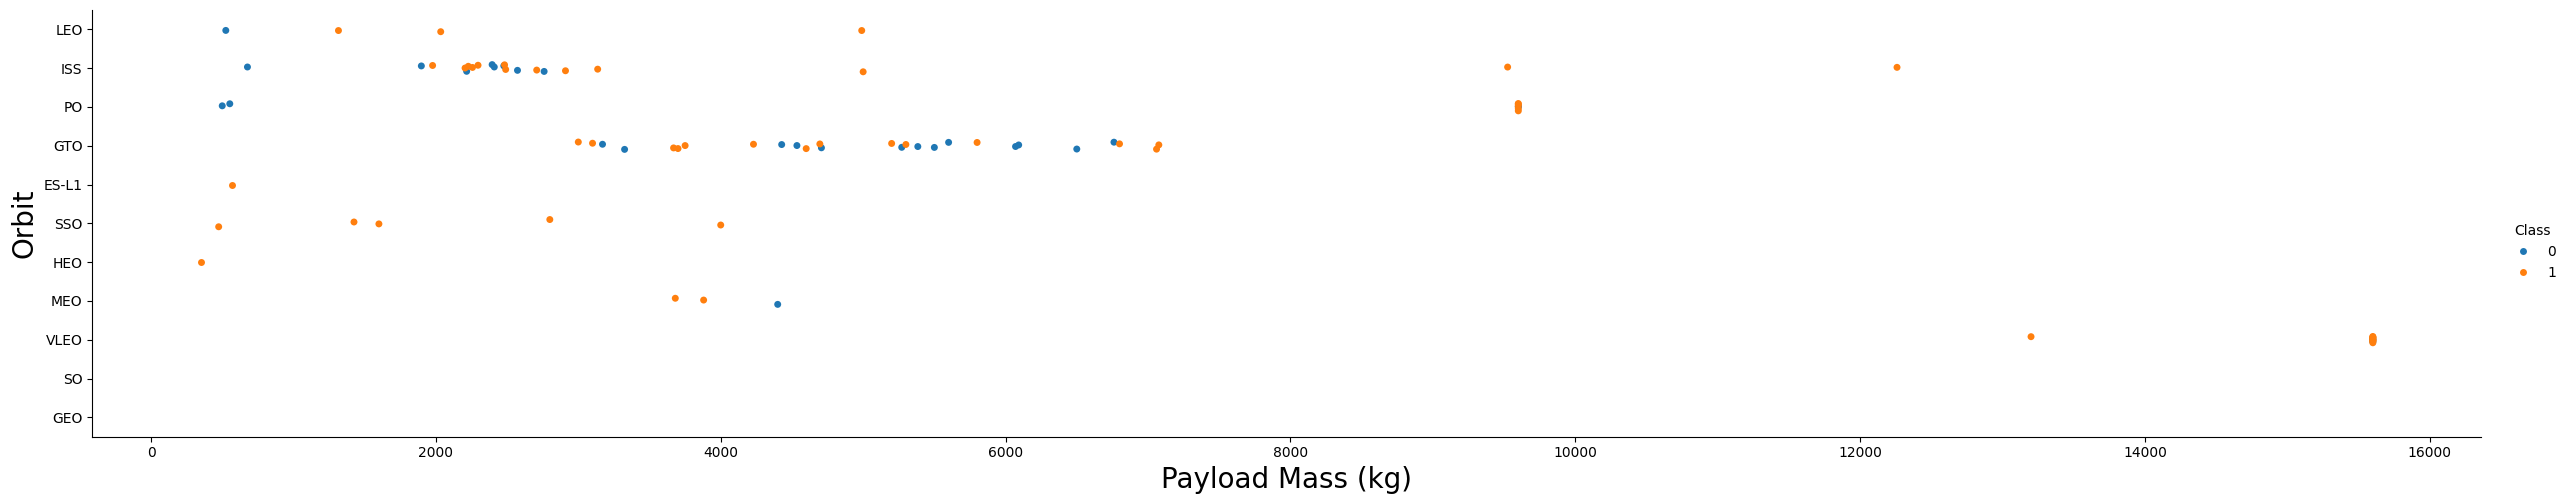

In [8]:
#Vizualize relationship between payload and orbit type 
sns.catplot(y="Orbit", x="PayloadMass", hue = "Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

With heavy payloads the positive landing rate are more for Polar,LEO and ISS.
However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

In [9]:
#Visualize the launch success yearly trend

# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


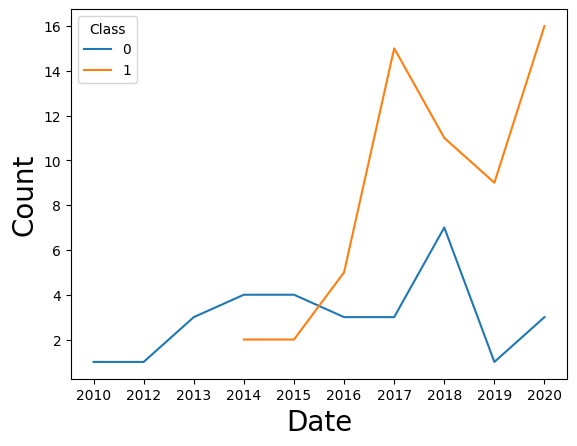

In [10]:
# Group by with as_index=False
counts = df.groupby(['Date', 'Class']).size().reset_index(name='Counts')

# Plotting
sns.lineplot(x='Date', y='Counts', hue='Class', data=counts)
plt.xlabel("Date", fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()




High Success in latest years. Sucess rate since 2013 kept increasing till 2020

Features Engineering 

In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,NaN,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.0,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.0,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.0,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [13]:
#create dummy variables 
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Identify numeric columns
numeric_columns = features_one_hot.select_dtypes(include=['int64', 'float64']).columns

# Cast numeric columns to float64
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Print the data types of all columns to verify the changes
print(features_one_hot.dtypes)


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056       bool
Serial_B1058       bool
Serial_B1059       bool
Serial_B1060       bool
Serial_B1062       bool
Length: 80, dtype: object


In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)